In [98]:
import os
import glob
import numpy as np
import re

In [99]:
import nibabel as nib
import dicom
import pylab
import matplotlib.cm as cm

In [100]:
from PIL import Image
import numpy as np # linear algebra
from keras.preprocessing import image
import os
import numpy as np
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout
from keras.optimizers import Adadelta
from keras.losses import binary_crossentropy
from keras.layers.convolutional import Conv2D
import matplotlib.pyplot as plt
from keras.layers.pooling import MaxPooling2D

In [101]:
import cv2

In [102]:
import sys

import keras
import pandas as pd
import sklearn as sk
import tensorflow as tf

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")

Tensor Flow Version: 1.12.0
Keras Version: 2.2.4

Python 3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]
Pandas 0.24.1
Scikit-Learn 0.20.3


In [103]:
print(os.listdir("C:/Users/roshn/Desktop/Just"))

['Just Control', 'Just PD']


In [104]:
data=[]
labels=[]
PD_path =os.listdir("C:/Users/roshn/Desktop/Just/Just PD/")
for pars in PD_path:
    try:
        image=cv2.imread("C:/Users/roshn/Desktop/Just/Just PD/"+ pars)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((64, 64))
        #image_from_array = image_from_array.convert('L')
        data.append(np.array(size_image))
        labels.append(0)
    except Exception as e:
        print(e)

In [105]:
control_path=os.listdir("C:/Users/roshn/Desktop/Just/Just Control/")
for unef in control_path:
    try:
        image=cv2.imread("C:/Users/roshn/Desktop/Just/Just Control/"+ unef)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((64, 64))
        data.append(np.array(size_image))
        labels.append(1)
    except Exception as e:
        print(e)

In [106]:
print('Lenght of Data : ' + str(len(data)))
print('Lenght of Data : ' + str(len(labels)))

Lenght of Data : 10548
Lenght of Data : 10548


In [107]:
numpy_data = np.array(data)
numpy_labels = np.array(labels)

In [108]:
print(size_image)
image.shape

<PIL.Image.Image image mode=RGB size=64x64 at 0x1C685D12DA0>


(192, 128, 3)

In [109]:
s = np.arange(numpy_data.shape[0])
print(s)
np.random.shuffle(s)
print(s)
numpy_data = numpy_data[s]
print(numpy_data)
numpy_labels = numpy_labels[s]
print(numpy_labels)
data_length = len(numpy_data)

[    0     1     2 ... 10545 10546 10547]
[9587 8755 2270 ... 2489 8013 9550]
[[[[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  ...

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 1  1  1]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 1  1  1]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]]


 [[[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  ...

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0

In [110]:
print('Lenght of Data : ' + str(len(numpy_data)))
print('Lenght of Data : ' + str(len(numpy_labels)))

Lenght of Data : 10548
Lenght of Data : 10548


In [111]:
from keras.layers import Conv2D, MaxPooling2D, MaxPooling1D, GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, LSTM, TimeDistributed
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from sklearn.model_selection import train_test_split
from keras.models import Sequential,Input,Model
from keras.utils import np_utils

In [15]:
#training_X = numpy_data[:round(data_length * 0.9)]
#training_Y = numpy_labels[:round(data_length * 0.9)]
#val_X = numpy_data[len(training_X) :round((len(training_X)) + (len(training_X) * 0.05)) ]
#val_Y = numpy_labels[len(training_Y) :round((len(training_Y)) + (len(training_Y) * 0.05))]
#test_X = numpy_data[round((len(training_X)) + (len(training_X) * 0.05)) : ]
#test_Y = numpy_labels[round((len(training_Y)) + (len(training_Y) * 0.05)): ]

In [112]:
training_X, test_X, training_Y, test_Y = train_test_split(numpy_data, numpy_labels, test_size = 0.1, random_state = 101)
#val_X = numpy_data[len(training_X) :round((len(training_X)) + (len(training_X) * 0.05)) ]
#val_Y = numpy_labels[len(training_Y) :round((len(training_Y)) + (len(training_Y) * 0.05))]
#y_train = to_categorical(y_train, num_classes = 2)
#y_valid = to_categorical(y_valid, num_classes = 2)

In [113]:
#one hot encoding
training_Y = np_utils.to_categorical(training_Y,  2)
test_Y = np_utils.to_categorical(test_Y,  2)
#val_Y = np_utils.to_categorical(val_Y,  2)

#y_train = np_utils.to_categorical(y_train,  2)
#y_test = np_utils.to_categorical(y_test,  2)

In [115]:
print(f'Shape of training image : {training_X.shape}')
print(f'Shape of testing image : {test_X.shape}')
print(f'Shape of training labels : {training_Y.shape}')
print(f'Shape of testing labels : {test_Y.shape}')
#print(f'Shape of training labels : {val_Y.shape}')
#print(f'Shape of testing labels : {val_X.shape}')

Shape of training image : (9493, 64, 64, 3)
Shape of testing image : (1055, 64, 64, 3)
Shape of training labels : (9493, 2)
Shape of testing labels : (1055, 2)


In [116]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers

In [117]:
#float and normalization
training_X = training_X.astype('float64') / 255
#val_X = val_X.astype('float64') / 255
test_X = test_X.astype('float64') / 255

In [118]:
print(training_X.shape)
#print(val_X.shape)
print(test_X.shape)

(9493, 64, 64, 3)
(1055, 64, 64, 3)


In [119]:
print('Lenght of Data : ' + str(len(training_X)))
print('Lenght of Data : ' + str(len(test_X)))

Lenght of Data : 9493
Lenght of Data : 1055


In [113]:
#print(round((len(training_X)) + (len(training_X) * 0.05)))

8085


In [120]:
inputShape= (64,64,3)
model=Sequential()
model.add(Conv2D(64, (3,3), activation = 'relu', input_shape = inputShape))
model.add(MaxPooling2D(2,2))
#model.add(BatchNormalization(axis =1))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
#model.add(BatchNormalization(axis = 1))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
#model.add(BatchNormalization(axis = 1))
model.add(Dropout(0.2))

model.add(Flatten())
    
model.add(Dense(128, activation = 'relu'))
#model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'sigmoid'))

model.summary()

#model.add(GlobalAveragePooling2D())
#model.add(Dense(1000, activation='relu'))
#model.add(Dense(2,activation='sigmoid'))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 29, 29, 32)        18464     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 12, 12, 32)        9248      
__________

In [121]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [122]:
graph_viz = model.fit(
        training_X,
        training_Y,
        epochs = 30,
        batch_size = 32,
        validation_split=0.2
        )


Train on 7594 samples, validate on 1899 samples
Epoch 1/30
7594/7594 [==============================] - 59s 8ms/step - loss: 0.6774 - acc: 0.5874 - val_loss: 0.6624 - val_acc: 0.5845
Epoch 2/30
7594/7594 [==============================] - 64s 8ms/step - loss: 0.6391 - acc: 0.6411 - val_loss: 0.5760 - val_acc: 0.7378
Epoch 3/30
7594/7594 [==============================] - 65s 8ms/step - loss: 0.5590 - acc: 0.7170 - val_loss: 0.4671 - val_acc: 0.7815
Epoch 4/30
7594/7594 [==============================] - 70s 9ms/step - loss: 0.4728 - acc: 0.7737 - val_loss: 0.3564 - val_acc: 0.8341
Epoch 5/30
7594/7594 [==============================] - 68s 9ms/step - loss: 0.4075 - acc: 0.8075 - val_loss: 0.3526 - val_acc: 0.8320
Epoch 6/30
7594/7594 [==============================] - 67s 9ms/step - loss: 0.3507 - acc: 0.8429 - val_loss: 0.3090 - val_acc: 0.8578
Epoch 7/30
7594/7594 [==============================] - 68s 9ms/step - loss: 0.3062 - acc: 0.8634 - val_loss: 0.2096 - val_acc: 0.9213
Epoch 8

In [212]:

#H = model.fit(training_X, training_Y, validation_data=(test_X, test_Y), epochs=25)

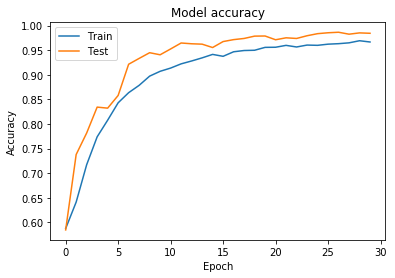

In [123]:
plt.plot(graph_viz.history['acc'])
plt.plot(graph_viz.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

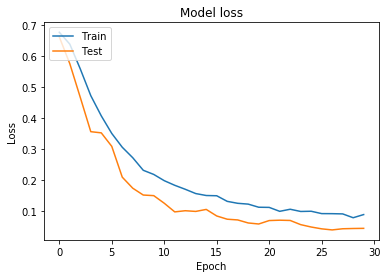

In [124]:
plt.plot(graph_viz.history['loss'])
plt.plot(graph_viz.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [125]:
# make predictions on the test set
preds = model.predict(test_X)
from sklearn.metrics import accuracy_score

print(accuracy_score(test_Y.argmax(axis=1), preds.argmax(axis=1)))

0.976303317535545


In [126]:
from sklearn.metrics import classification_report
print(classification_report(test_Y.argmax(axis=1), preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       603
           1       0.98      0.96      0.97       452

   micro avg       0.98      0.98      0.98      1055
   macro avg       0.98      0.97      0.98      1055
weighted avg       0.98      0.98      0.98      1055



In [127]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    from sklearn.metrics import confusion_matrix
    from sklearn.utils.multiclass import unique_labels
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[595   8]
 [ 17 435]]


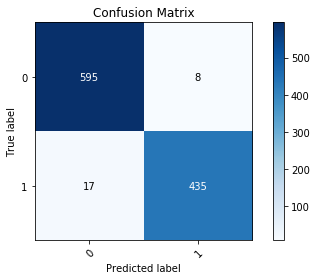

In [128]:
class_names=np.array((0,1))
plot_confusion_matrix(test_Y.argmax(axis=1), preds.argmax(axis=1), classes=class_names, title='Confusion Matrix')

In [129]:
#from sklearn.metrics import classification_report
#pred= model.predict(test_X)
#print(classification_report(np.argmax(test_Y, axis = 1),np.argmax(pred, axis = 1)))

In [305]:
print(pred)

[[4.97145986e-04]
 [8.50929134e-03]
 [3.59130581e-06]
 [5.79242587e-01]
 [9.98009980e-01]
 [3.45637403e-07]
 [1.71112133e-05]
 [4.83288795e-01]
 [8.07729483e-01]
 [9.68805313e-01]
 [3.50166738e-05]
 [9.42503452e-01]
 [9.98165667e-01]
 [9.38226044e-01]
 [5.70229217e-02]
 [9.94289041e-01]
 [9.99996662e-01]
 [9.99960661e-01]
 [7.63130486e-01]
 [1.53056636e-01]
 [9.99999523e-01]
 [3.93764275e-08]
 [2.86045719e-07]
 [9.28316786e-06]
 [3.72519881e-01]
 [1.20114346e-05]
 [2.98176445e-02]
 [9.99978185e-01]
 [8.41138363e-02]
 [1.24788528e-06]
 [2.70226446e-05]
 [4.00778799e-10]
 [8.37963581e-01]
 [9.99995112e-01]
 [6.20832841e-04]
 [2.08854158e-06]
 [9.99401450e-01]
 [1.51327084e-09]
 [9.59907651e-01]
 [9.75902498e-01]
 [7.61782408e-01]
 [9.94676352e-01]
 [8.05058517e-05]
 [4.28916924e-02]
 [4.24842350e-02]
 [1.27052635e-01]
 [8.70333552e-01]
 [7.39769348e-06]
 [1.84295271e-02]
 [3.24939052e-03]
 [7.65773817e-04]
 [6.38977008e-06]
 [9.99810159e-01]
 [1.38616518e-09]
 [9.13949527e-10]
 [9.987159

In [130]:
test_loss,test_acc = model.evaluate(test_X,test_Y)
print(test_loss)
print(test_acc)

1055/1055 [==============================] - 2s 2ms/step
0.054756880807359284
0.975829383886256


In [307]:
print(test_Y[1])
print(pred[1])

[0. 1.]
[0.00850929]


In [423]:
score = model.evaluate(test_X,test_Y)
print("Test Score:", score[0])
print('Accurarcy:', score[1])

1055/1055 [==============================] - 6s 6ms/step
Test Score: 0.060004951921402
Accurarcy: 0.9753554493895075
